[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the accompanying [blog post](https://blog.roboflow.com/how-to-train-yolov8-instance-segmentation/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Jan  8 17:05:47 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)
!pip install -U "numpy<2" ultralytics

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 116MB/s] 
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,810,560 parameters, 0 gradients, 40.1 GFLOPs

100% 104k/104k [00:00<00:00, 115MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 79.8ms
Speed: 2.7ms preprocess, 79.8ms inference, 278.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


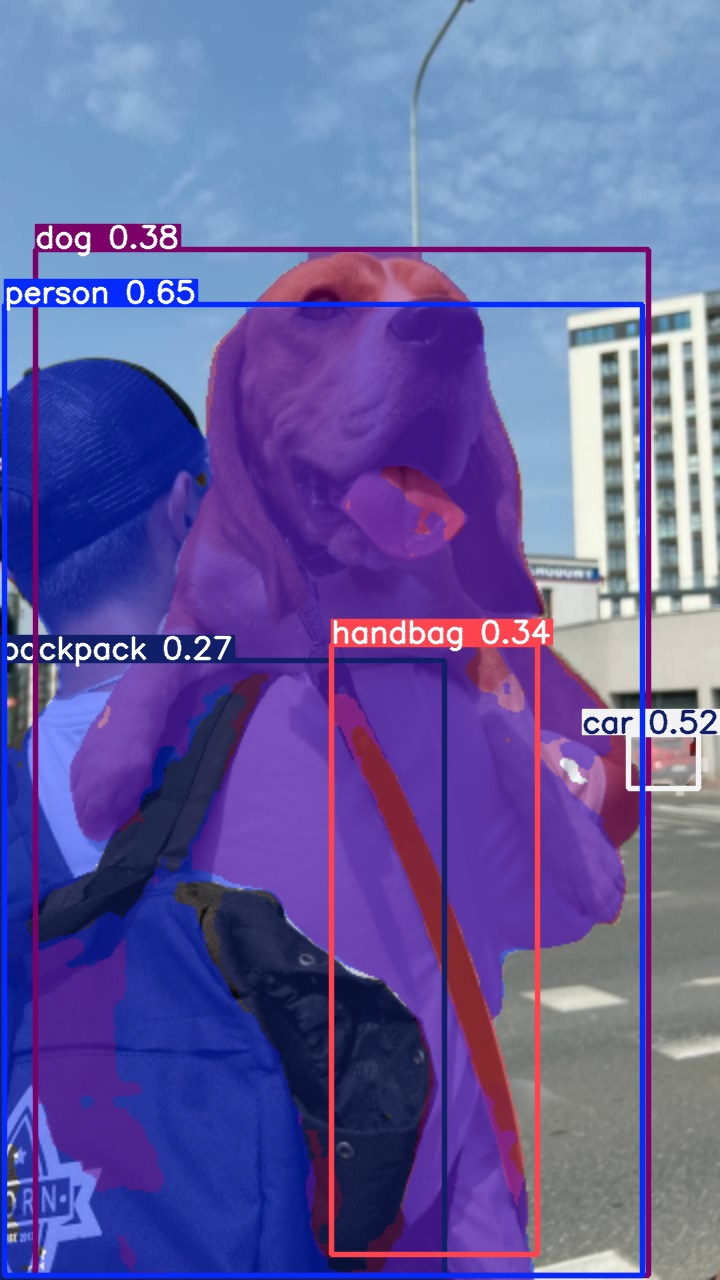

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 53.8ms
Speed: 1.8ms preprocess, 53.8ms inference, 69.5ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8928e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLOv8` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/yolo_seg_dataset.zip"

if os.path.exists(zip_path):
    print(f"✅ Trovato: {zip_path}")
    print("📦 Estrazione...")
    # The zip file contains a top-level directory named 'EchoNet-Dynamic_yolo'
    # We will extract it and reference this directory.
    target_dir = '/content/EchoNet-Dynamic_yolo'
    os.makedirs(target_dir, exist_ok=True)
    # Use -o to overwrite files without prompting
    !unzip -q -o "{zip_path}" -d /content/

    yaml_content = f"""path: {target_dir}
train: images/train
val: images/val
test: images/test

nc: 1
names: ['ventricle']
"""

    # The data.yaml should be created inside the actual dataset directory
    with open(f'{target_dir}/data.yaml', 'w') as f:
        f.write(yaml_content)

    print("✅ Dataset pronto!")
    # Check if the directories exist before listing their contents
    if os.path.exists(f'{target_dir}/images/train'):
        print(f"Train: {len(os.listdir(f'{target_dir}/images/train'))}")
    else:
        print(f"Train directory not found: {target_dir}/images/train")

    if os.path.exists(f'{target_dir}/images/val'):
        print(f"Val: {len(os.listdir(f'{target_dir}/images/val'))}")
    else:
        print(f"Val directory not found: {target_dir}/images/val")

    if os.path.exists(f'{target_dir}/images/test'):
        print(f"Test: {len(os.listdir(f'{target_dir}/images/test'))}")
    else:
        print(f"Test directory not found: {target_dir}/images/test")
else:
    print(f"❌ File non trovato: {zip_path}")
    !ls -la "/content/drive/MyDrive/"

Mounted at /content/drive
✅ Trovato: /content/drive/MyDrive/yolo_seg_dataset.zip
📦 Estrazione...
✅ Dataset pronto!
Train: 14920
Val: 2576
Test: 2552


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8n-seg.pt data={target_dir}/data.yaml epochs=10 imgsz=112

/content
100% 6.74M/6.74M [00:00<00:00, 106MB/s]
New https://pypi.org/project/ultralytics/8.3.249 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/EchoNet-Dynamic_yolo/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=112, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

/content


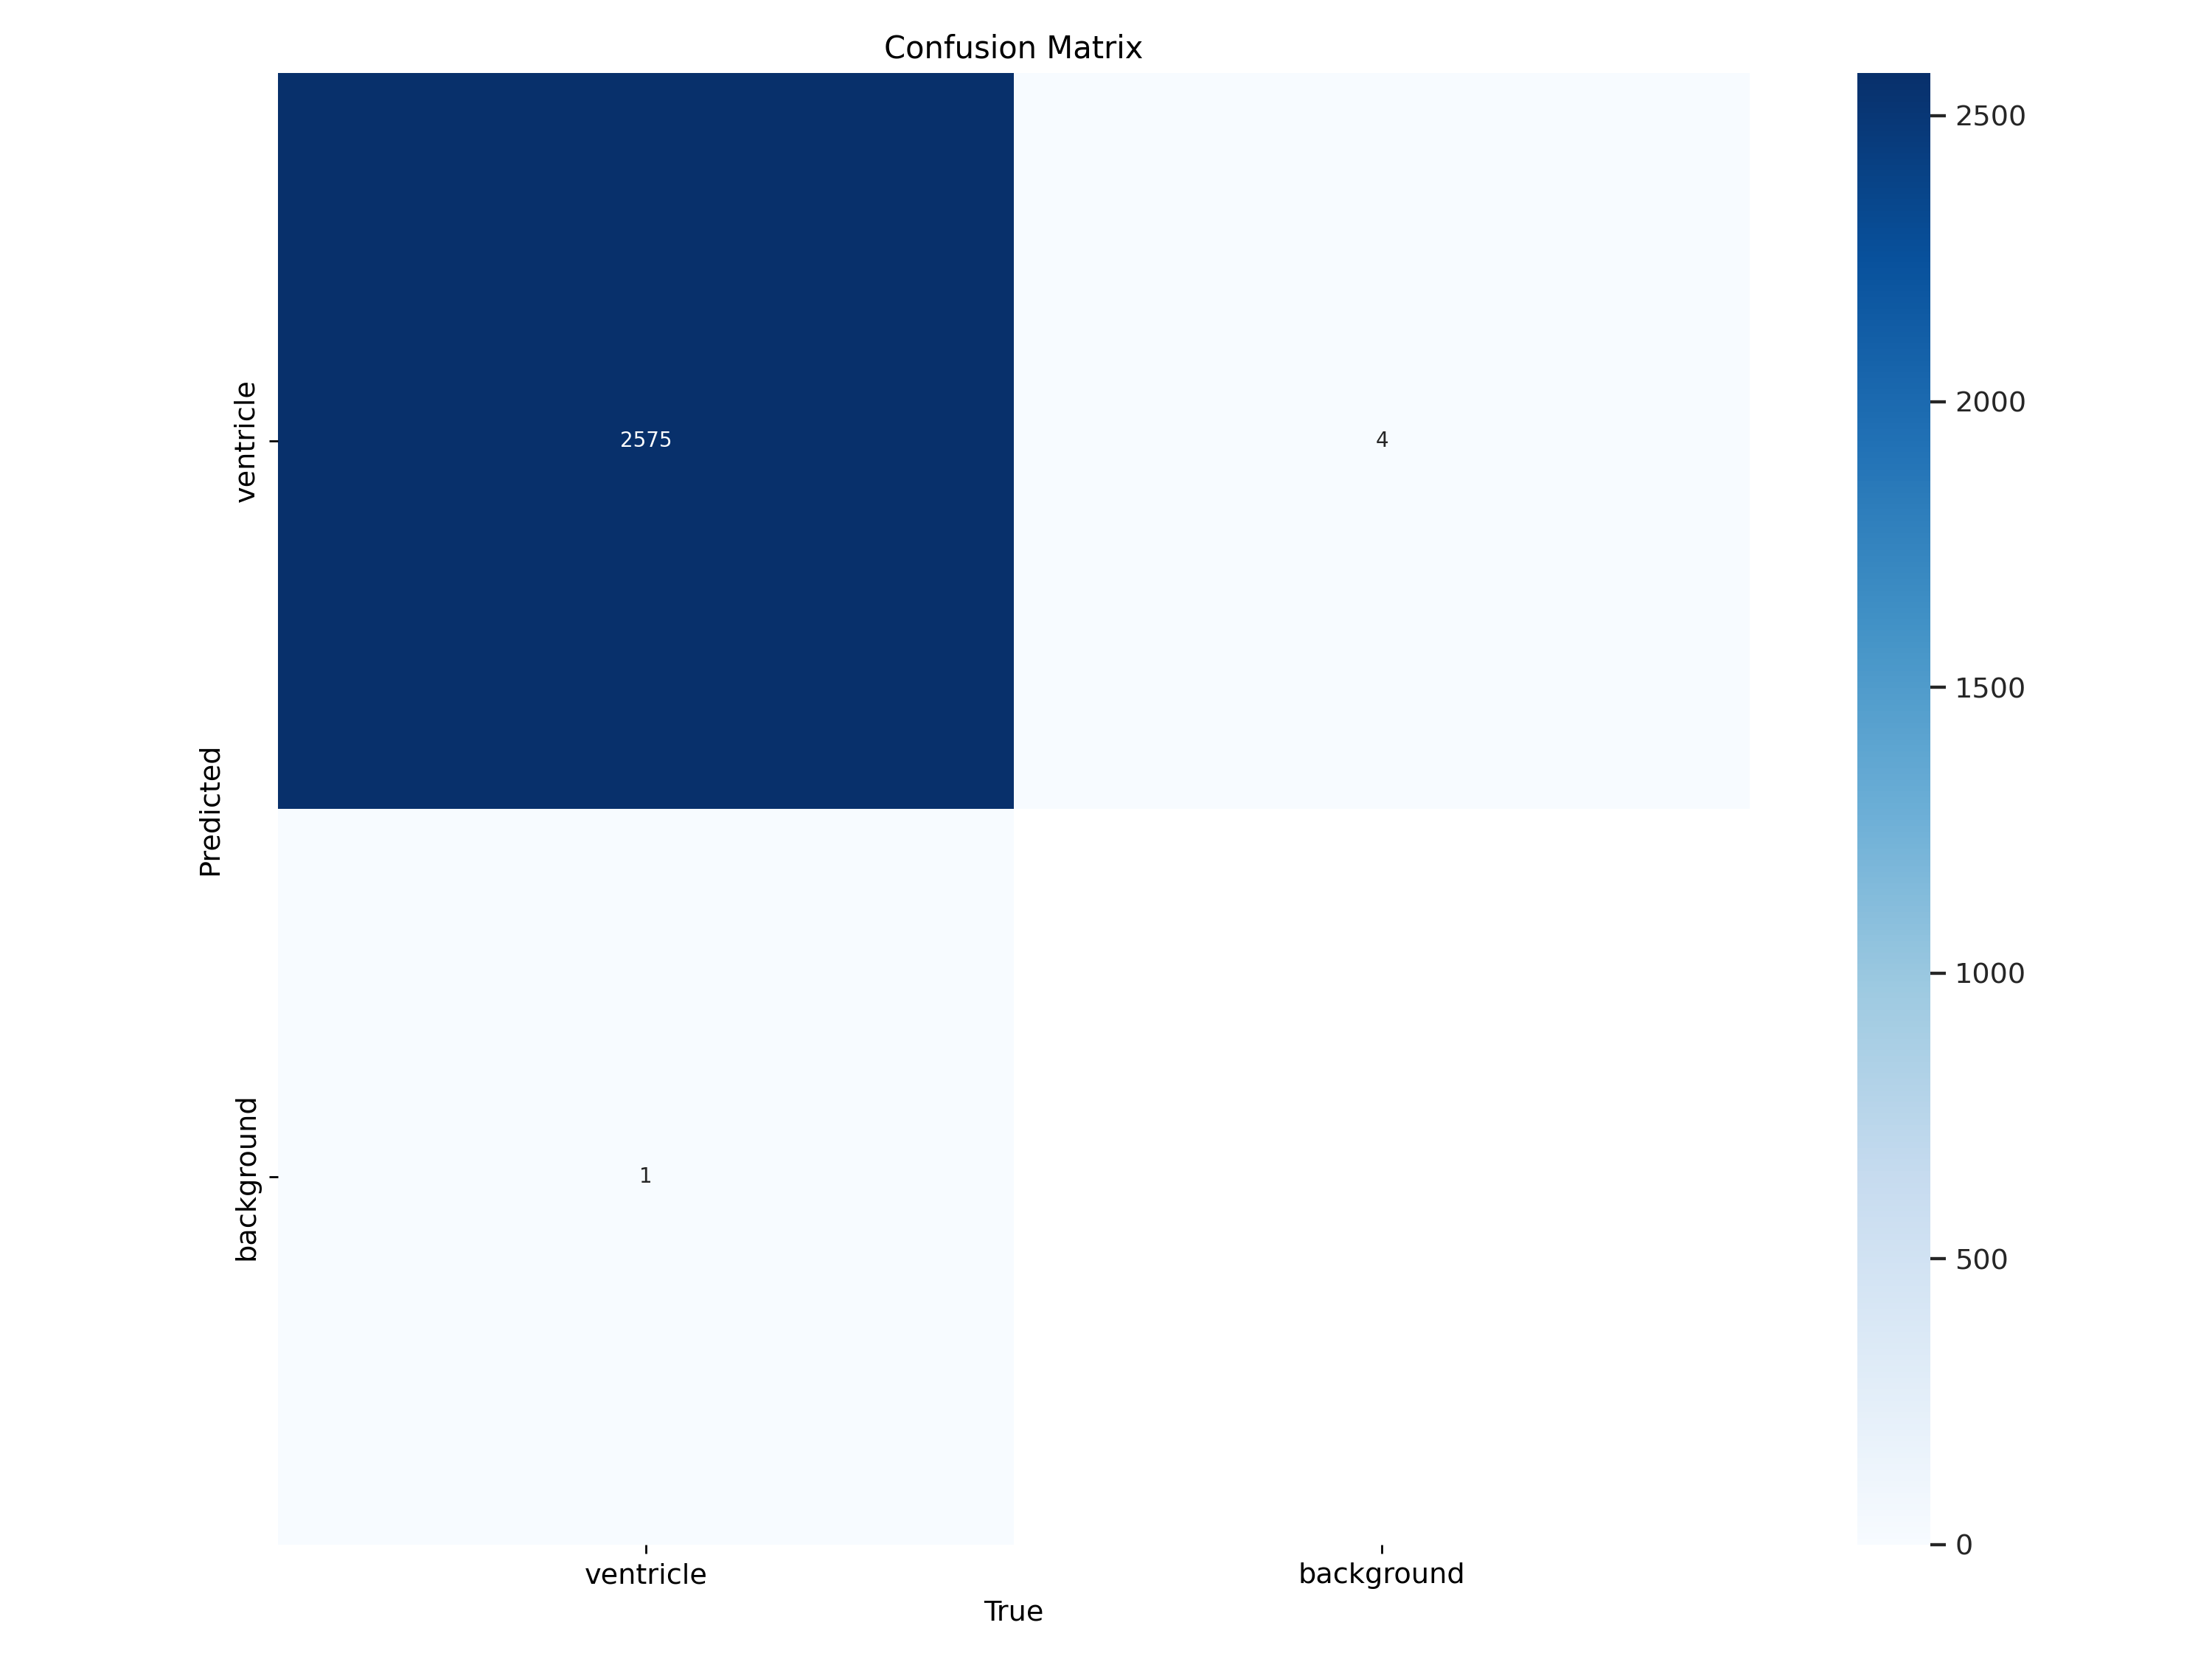

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


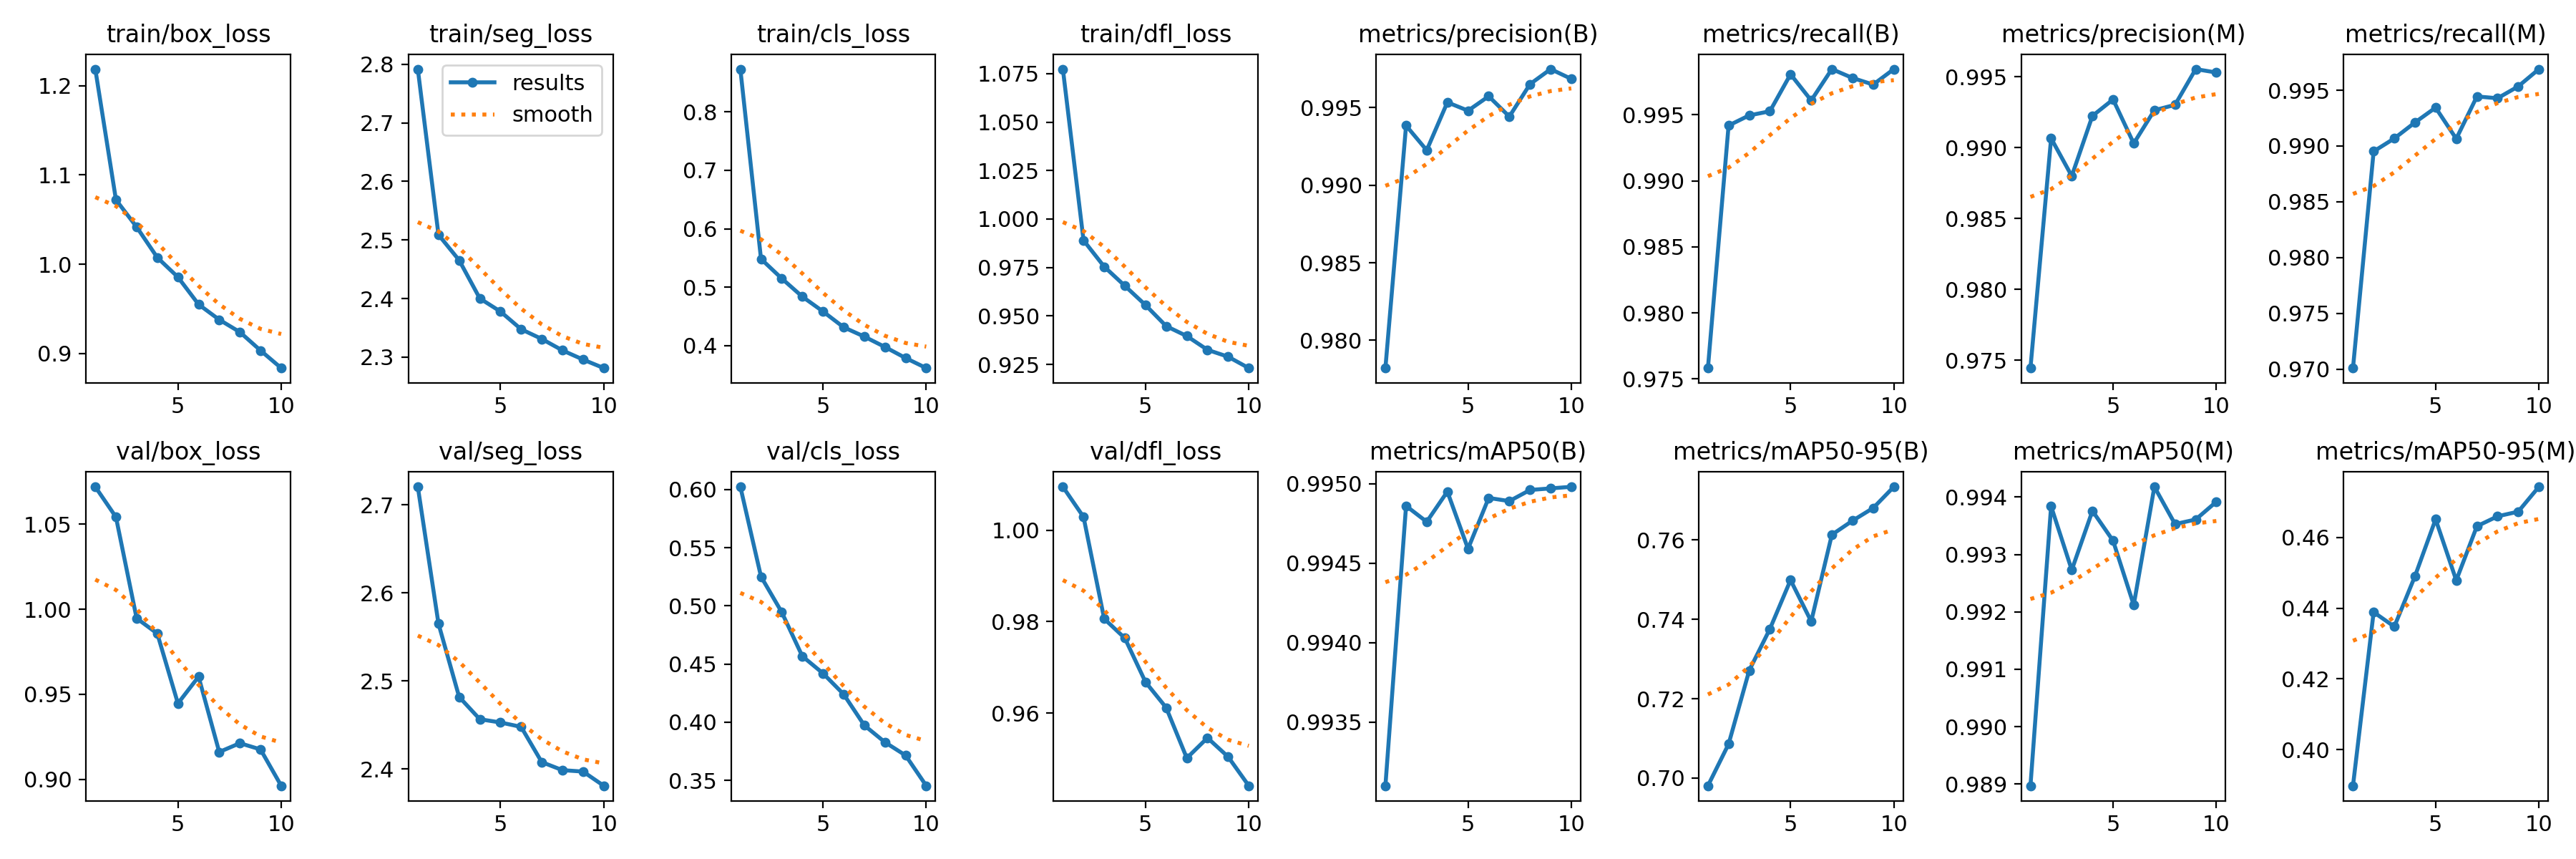

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


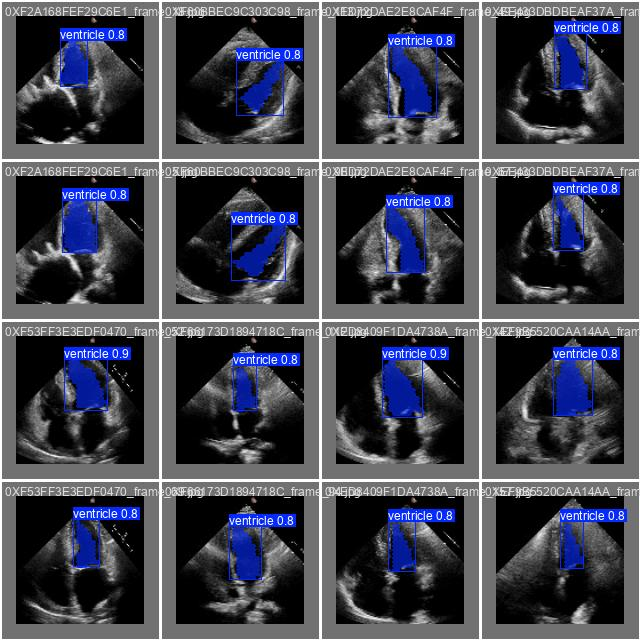

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val \
  model=/content/runs/segment/train/weights/best.pt \
  data=/content/EchoNet-Dynamic_yolo/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 11.3 GFLOPs
val: Scanning /content/EchoNet-Dynamic_yolo/labels/val.cache... 2576 images, 0 backgrounds, 0 corrupt: 100% 2576/2576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 161/161 [00:14<00:00, 11.13it/s]
                   all       2576       2576      0.997      0.998      0.995      0.774      0.995      0.997      0.994      0.473
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source=/content/EchoNet-Dynamic_yolo/images/test save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 11.3 GFLOPs

image 1/2552 /content/EchoNet-Dynamic_yolo/images/test/0X100CF05D141FF143_frame_132.jpg: 128x128 1 ventricle, 6.1ms
image 2/2552 /content/EchoNet-Dynamic_yolo/images/test/0X100CF05D141FF143_frame_148.jpg: 128x128 1 ventricle, 7.2ms
image 3/2552 /content/EchoNet-Dynamic_yolo/images/test/0X1012703CDC1436FE_frame_154.jpg: 128x128 1 ventricle, 6.1ms
image 4/2552 /content/EchoNet-Dynamic_yolo/images/test/0X1012703CDC1436FE_frame_172.jpg: 128x128 1 ventricle, 6.0ms
image 5/2552 /content/EchoNet-Dynamic_yolo/images/test/0X102CFB07F752AAE6_frame_163.jpg: 128x128 1 ventricle, 5.9ms
image 6/2552 /content/EchoNet-Dynamic_yolo/images/test/0X102CFB07F752AAE6_frame_184.jpg: 128x128 1 ventricle, 5.9ms
image 7/2552 /content/EchoNet-Dynamic_yolo/images/test/0X105B9EF57DE45DCB_frame_106.jpg: 128x128 1 ventricle, 5.9ms
im

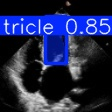

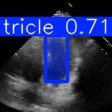

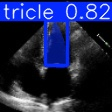

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/segment/predict2/*.jpg')[:3]:
    display(Image(filename=image_path, height=400))
    print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and storage for later use.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
import shutil

model_source = '/content/runs/segment/train/weights/best.pt'
model_destination = '/content/drive/MyDrive/ventricle_segmentation_model.pt'

shutil.copy(model_source, model_destination)
print(f"✅ Modello salvato su Drive: {model_destination}")

✅ Modello salvato su Drive: /content/drive/MyDrive/ventricle_segmentation_model.pt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CAM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Trovato: /content/drive/MyDrive/yolo_seg_dataset.zip
📦 Estrazione...

image 1/1 /content/EchoNet-Dynamic_yolo/images/test/0X1ADDEA184822F38E_frame_62.jpg: 128x128 1 ventricle, 7.1ms
Speed: 8.6ms preprocess, 7.1ms inference, 53.8ms postprocess per image at shape (1, 3, 128, 128)
Layer scelto per CAM: Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


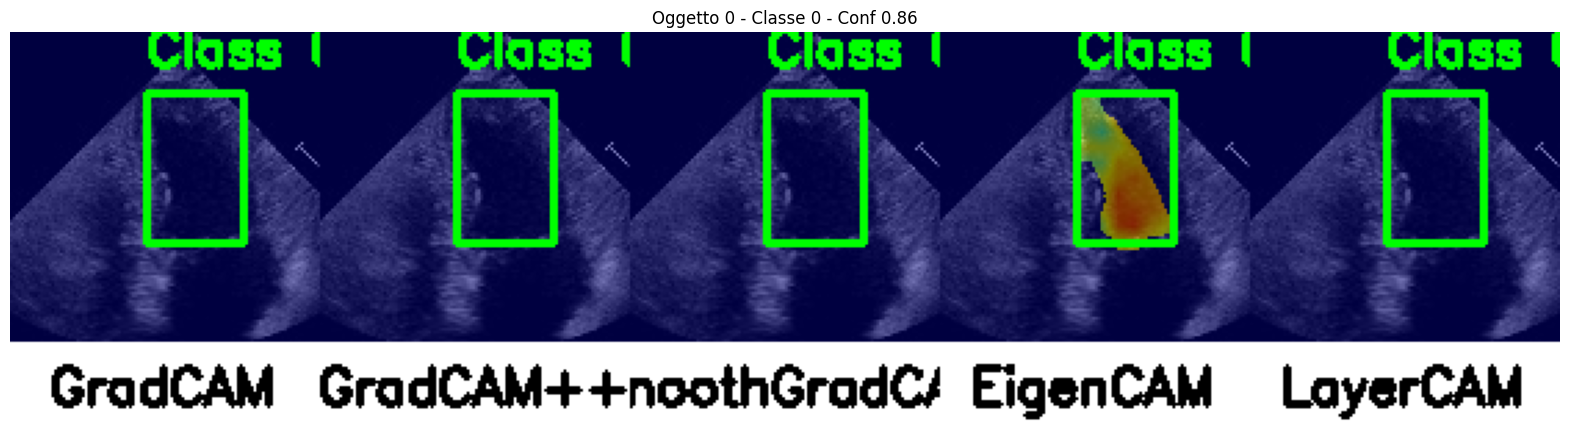

Salvata CAM oggetto 0 -> /content/drive/MyDrive/CAM_results/object_0_class_0.png


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from torchvision import transforms
import os
from google.colab import drive

# Monta Drive
drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/yolo_seg_dataset.zip"

if os.path.exists(zip_path):
    print(f"✅ Trovato: {zip_path}")
    print("📦 Estrazione...")
    # The zip file contains a top-level directory named 'EchoNet-Dynamic_yolo'
    # We will extract it and reference this directory.
    target_dir = '/content/EchoNet-Dynamic_yolo'
    os.makedirs(target_dir, exist_ok=True)
    # Use -o to overwrite files without prompting
    !unzip -q -o "{zip_path}" -d /content/

    yaml_content = f"""path: {target_dir}
train: images/train
val: images/val
test: images/test

nc: 1
names: ['ventricle']
"""

    # The data.yaml should be created inside the actual dataset directory
    with open(f'{target_dir}/data.yaml', 'w') as f:
        f.write(yaml_content)

# --- PARAMETRI ---
img_path = "/content/EchoNet-Dynamic_yolo/images/test/0X1ADDEA184822F38E_frame_62.jpg"
model_path = "/content/drive/MyDrive/ventricle_segmentation_model.pt"
target_class = 0  # Classe ventricolo
confidence_threshold = 0.3
save_dir = "/content/drive/MyDrive/CAM_results"  # Salva su Drive
os.makedirs(save_dir, exist_ok=True)

# --- VERIFICA ESISTENZA FILE IMMAGINE ---
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Il file immagine non è stato trovato: {img_path}\nControlla che il dataset sia stato estratto correttamente e che il percorso sia esatto.")

# --- CARICAMENTO MODELLO ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = YOLO(model_path)
model.model.to(device)
model.model.eval()

# --- CARICAMENTO IMMAGINE ---
img = Image.open(img_path).convert("RGB")
img_np = np.array(img)

transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor()
])
input_tensor = transform(img).unsqueeze(0).to(device)
input_tensor.requires_grad = True

# --- OTENIAMO DETECTIONS ---
results = model(img_path)[0]
if results.masks is None:
    raise ValueError("Nessuna mask trovata nell'immagine!")

masks = results.masks.data.cpu().numpy()   # [N,H,W]
boxes = results.boxes
confidences = boxes.conf.cpu().numpy()
classes = boxes.cls.cpu().numpy().astype(int)
xyxy = boxes.xyxy.cpu().numpy()

# --- TROVA ULTIMO LAYER CONV EFFETTIVO ---
target_layer = None
for m in reversed(model.model.model):
    if hasattr(m, 'conv'):
        target_layer = m.conv
        break
    elif hasattr(m, 'cv'):
        target_layer = m.cv
        break
if target_layer is None:
    raise ValueError("Non trovato layer conv nel modello!")
print("Layer scelto per CAM:", target_layer)

# --- HOOKS PER CAM ---
activations = []
gradients = []

def forward_hook(module, input, output):
    activations.append(output)

def backward_hook(module, grad_in, grad_out):
    gradients.append(grad_out[0])

hook_f = target_layer.register_forward_hook(forward_hook)
hook_b = target_layer.register_backward_hook(backward_hook)

# --- FUNZIONI CAM ---
def compute_gradcam(acts, grads):
    weights = np.mean(grads, axis=(1, 2))
    cam = np.zeros(acts.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * acts[i, :, :]
    return np.maximum(cam, 0)

def compute_gradcam_plus_plus(acts, grads):
    numerator = grads ** 2
    denominator = 2 * numerator + np.sum(acts * grads**3, axis=(1,2), keepdims=True)
    denominator = np.where(denominator != 0, denominator, 1.0)
    alpha = numerator / denominator
    weights = np.sum(alpha * np.maximum(grads, 0), axis=(1,2))
    cam = np.zeros(acts.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * acts[i, :, :]
    return np.maximum(cam, 0)

def smooth_gradcam(acts, grads, stdev_spread=0.15, nsamples=10):
    stdev = stdev_spread * (np.max(acts)-np.min(acts))
    total = np.zeros_like(acts[0])
    for _ in range(nsamples):
        noise = np.random.normal(0, stdev, acts.shape)
        total += compute_gradcam(acts+noise, grads)
    return total/nsamples

def compute_eigencam(acts):
    c, h, w = acts.shape
    acts_flat = acts.reshape(c, -1)
    u, s, vh = np.linalg.svd(acts_flat, full_matrices=False)
    principal = u[:,0]
    cam = np.tensordot(principal, acts_flat, axes=([0],[0]))
    cam = cam.reshape(h,w)
    return np.maximum(cam,0)

def compute_layercam(acts, grads):
    weights = np.maximum(grads,0)
    cam = np.sum(weights*acts, axis=0)
    return np.maximum(cam,0)

def normalize_and_resize(cam, size):
    cam = cv2.resize(cam, size)
    cam -= cam.min()
    if cam.max() != 0:
        cam = cam / cam.max()
    return cam

cam_methods = {
    "GradCAM": compute_gradcam,
    "GradCAM++": compute_gradcam_plus_plus,
    "SmoothGradCAM": smooth_gradcam,
    "EigenCAM": compute_eigencam,
    "LayerCAM": compute_layercam
}

# --- ELABORAZIONE OGGETTI ---
for i, mask in enumerate(masks):
    cls = classes[i]
    conf = confidences[i]
    if target_class is not None and cls != target_class:
        continue
    if conf < confidence_threshold:
        continue

    # Reset hooks
    activations.clear()
    gradients.clear()

    # Convert input_tensor to float for gradient computation
    input_tensor = input_tensor.float()

    # Ensure input_tensor requires gradients
    if not input_tensor.requires_grad:
        input_tensor.requires_grad = True

    output_raw = model.model(input_tensor)[0]
    max_conf_score = output_raw[:,4,:].max()
    model.model.zero_grad()
    max_conf_score.backward()

    acts_val = activations[0].cpu().data.numpy()[0]
    grads_val = gradients[0].cpu().data.numpy()[0]

    overlays = []
    for name, func in cam_methods.items():
        if name=="EigenCAM":
            cam = func(acts_val)
        else:
            cam = func(acts_val, grads_val)
        cam = normalize_and_resize(cam, (img.width, img.height))
        mask_resized = cv2.resize(mask, (img.width, img.height))
        cam = cam*mask_resized

        # Creazione overlay con bounding box e confidenza
        heatmap_color = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
        overlay = cv2.addWeighted(img_np, 0.5, heatmap_color, 0.5, 0)
        x1,y1,x2,y2 = map(int, xyxy[i])
        cv2.rectangle(overlay, (x1,y1),(x2,y2), (0,255,0),2)
        cv2.putText(overlay,f"Class {cls}:{conf:.2f}", (x1,y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0),2)

        # --- Aggiungi nome CAM sotto l'immagine ---
        h, w, c = overlay.shape
        text_height = 30
        labeled = np.ones((h + text_height, w, c), dtype=np.uint8) * 255
        labeled[:h, :, :] = overlay
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(name, font, font_scale, thickness)[0]
        text_x = (w - text_size[0]) // 2
        text_y = h + (text_height + text_size[1]) // 2
        cv2.putText(labeled, name, (text_x, text_y), font, font_scale, (0,0,0), thickness)

        overlays.append(labeled)

    # Combina tutte le CAM affiancate
    combined = np.hstack(overlays)

    # Mostra
    plt.figure(figsize=(20,6))
    plt.imshow(combined)
    plt.axis("off")
    plt.title(f"Oggetto {i} - Classe {cls} - Conf {conf:.2f}")
    plt.show()

    # Salva immagine
    save_path = os.path.join(save_dir, f"object_{i}_class_{cls}.png")
    cv2.imwrite(save_path, cv2.cvtColor(combined, cv2.COLOR_RGB2BGR))
    print(f"Salvata CAM oggetto {i} -> {save_path}")

# --- RIMUOVI HOOKS ---
hook_f.remove()
hook_b.remove()


# Regression

In [1]:
!pip install transformers timm torchvision scikit-learn -q
!pip install -U "flwr[simulation]" -q
!pip install captum

In [2]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/yolo_seg_dataset.zip"

if not os.path.exists("/content/EchoNet-Dynamic_yolo"):
    print("📦 Estrazione dataset...")
    !unzip -q -o "{zip_path}" -d /content/
    print("✅ Dataset estratto!")
else:
    print("✅ Dataset già presente")

# Percorsi
drive_base = "/content/drive/MyDrive/regression_datasets"
dataset_base = "/content/EchoNet-Dynamic_yolo/images"

def fix_csv(input_csv, output_csv):
    """Aggiunge prefisso ai percorsi relativi"""
    df = pd.read_csv(input_csv)
    df['path'] = df['path'].apply(lambda x: os.path.join(dataset_base, x))
    df.to_csv(output_csv, index=False)
    print(f"✅ {os.path.basename(output_csv)}: {len(df)} righe")
    return df

# Fix CSV per ESV
print("📊 Preparazione CSV per ESV...")
fix_csv(f"{drive_base}/esv/train.csv", "/content/train_esv.csv")
fix_csv(f"{drive_base}/esv/val.csv", "/content/val_esv.csv")
fix_csv(f"{drive_base}/esv/test.csv", "/content/test_esv.csv")

# Fix CSV per EDV
print("\n📊 Preparazione CSV per EDV...")
fix_csv(f"{drive_base}/edv/train.csv", "/content/train_edv.csv")
fix_csv(f"{drive_base}/edv/val.csv", "/content/val_edv.csv")
fix_csv(f"{drive_base}/edv/test.csv", "/content/test_edv.csv")

print("\n✅ CSV pronti per il training!")

Mounted at /content/drive
📦 Estrazione dataset...
✅ Dataset estratto!
📊 Preparazione CSV per ESV...
✅ train_esv.csv: 14920 righe
✅ val_esv.csv: 2576 righe
✅ test_esv.csv: 2552 righe

📊 Preparazione CSV per EDV...
✅ train_edv.csv: 14920 righe
✅ val_edv.csv: 2576 righe
✅ test_edv.csv: 2552 righe

✅ CSV pronti per il training!


In [3]:
script_path = "/content/drive/MyDrive/regression.py"

if os.path.exists(script_path):
    !cp "{script_path}" /content/regression.py
    print("✅ Script caricato!")
    !ls -lh /content/regression.py
else:
    print(f"❌ Script non trovato: {script_path}")

✅ Script caricato!
-rw------- 1 root root 8.9K Feb  1 10:47 /content/regression.py


In [ ]:
!python /content/regression.py \
  --train_csv /content/train_esv.csv \
  --val_csv /content/val_esv.csv \
  --test_csv /content/test_esv.csv \
  --epochs 100 \
  --batch 16 \
  --lr 0.00001 \
  --model google/vit-base-patch16-224 \
  --freeze n \
  --federated n

2026-02-01 17:29:46.207085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769966986.244851   99664 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769966986.255001   99664 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769966986.279168   99664 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769966986.279196   99664 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769966986.279207   99664 computation_placer.cc:177] computation placer alr

📁 Esperimento: 2026-02-01_10-48-07


train_loss.png:


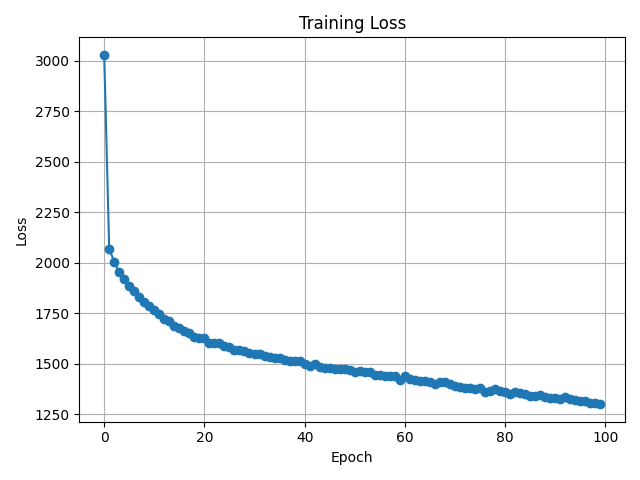


val_mse.png:


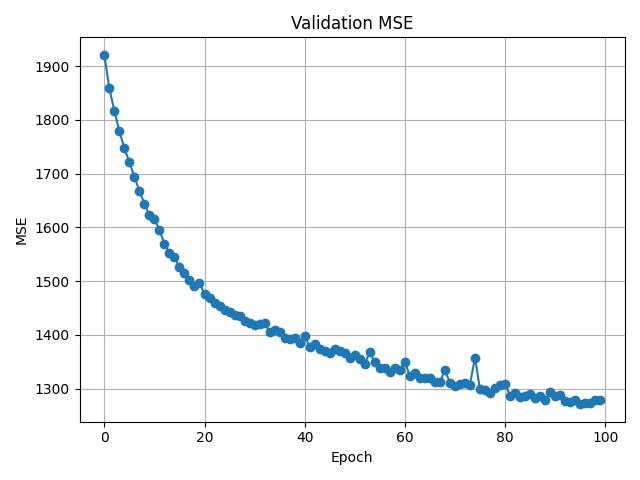


val_r2.png:


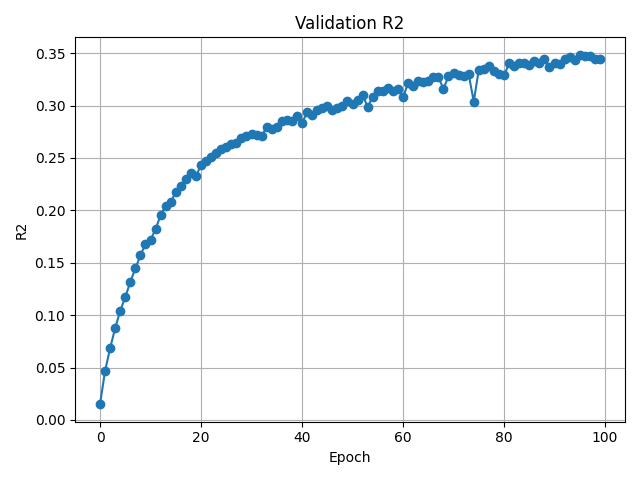

In [5]:
import os
from IPython.display import Image, display

results_dir = "/content/results"
experiments = sorted(os.listdir(results_dir))
latest = experiments[-1]
exp_dir = os.path.join(results_dir, latest)

print(f"📁 Esperimento: {latest}\n")

# Mostra grafici
plots_dir = f"{exp_dir}/plots"
for plot_file in ['train_loss.png', 'val_mse.png', 'val_r2.png']:
    path = f"{plots_dir}/{plot_file}"
    if os.path.exists(path):
        print(f"\n{plot_file}:")
        display(Image(filename=path))

In [6]:
import shutil

results_dir = "/content/results"
if os.path.exists(results_dir):
    experiments = sorted(os.listdir(results_dir))
    if experiments:
        latest = experiments[-1]
        source = os.path.join(results_dir, latest)
        dest = f"/content/drive/MyDrive/vit_experiments/{latest}"

        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copytree(source, dest)
        print(f"✅ Risultati salvati in: {dest}")

✅ Risultati salvati in: /content/drive/MyDrive/vit_experiments/2026-02-01_10-48-07


✓ Salvato: confronto_train_loss.png


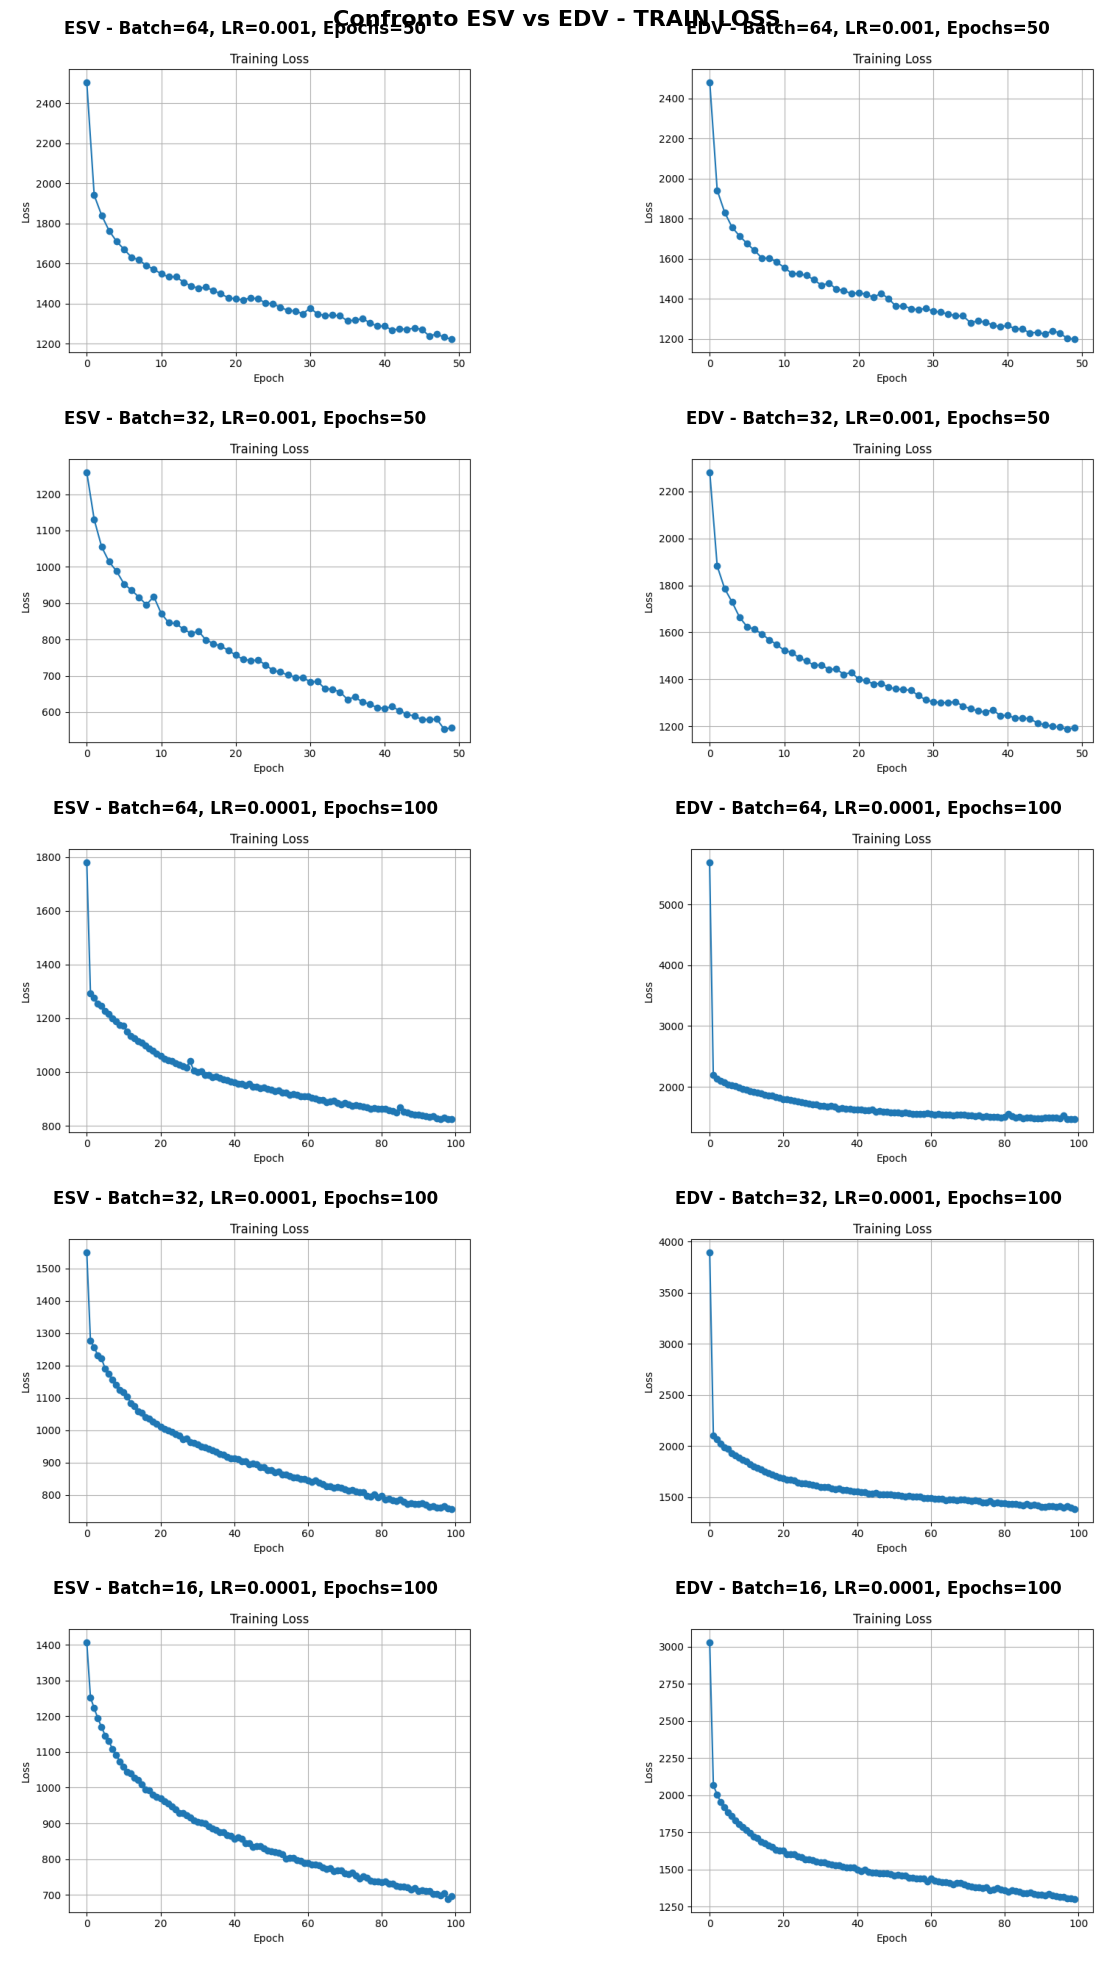

✓ Salvato: confronto_val_r2.png


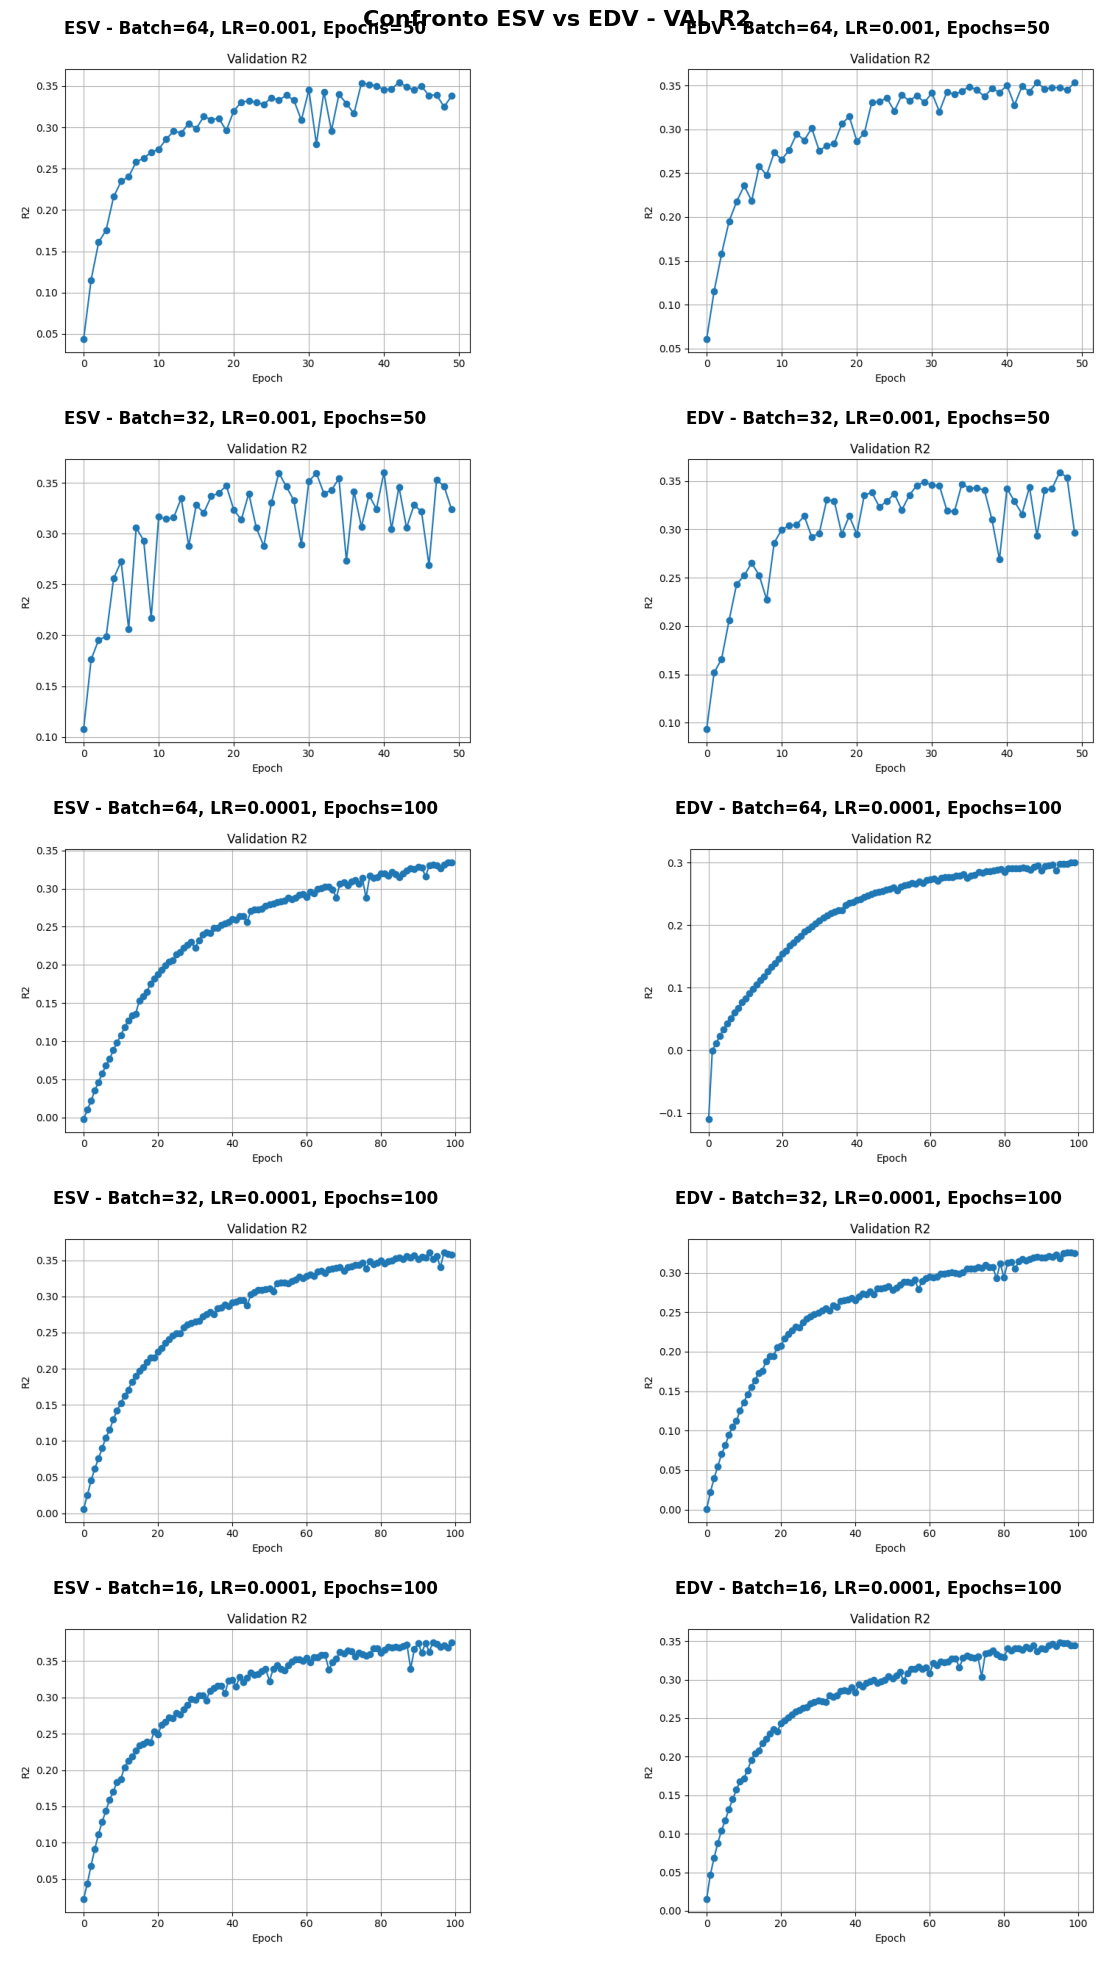

✓ Salvato: confronto_val_mse.png


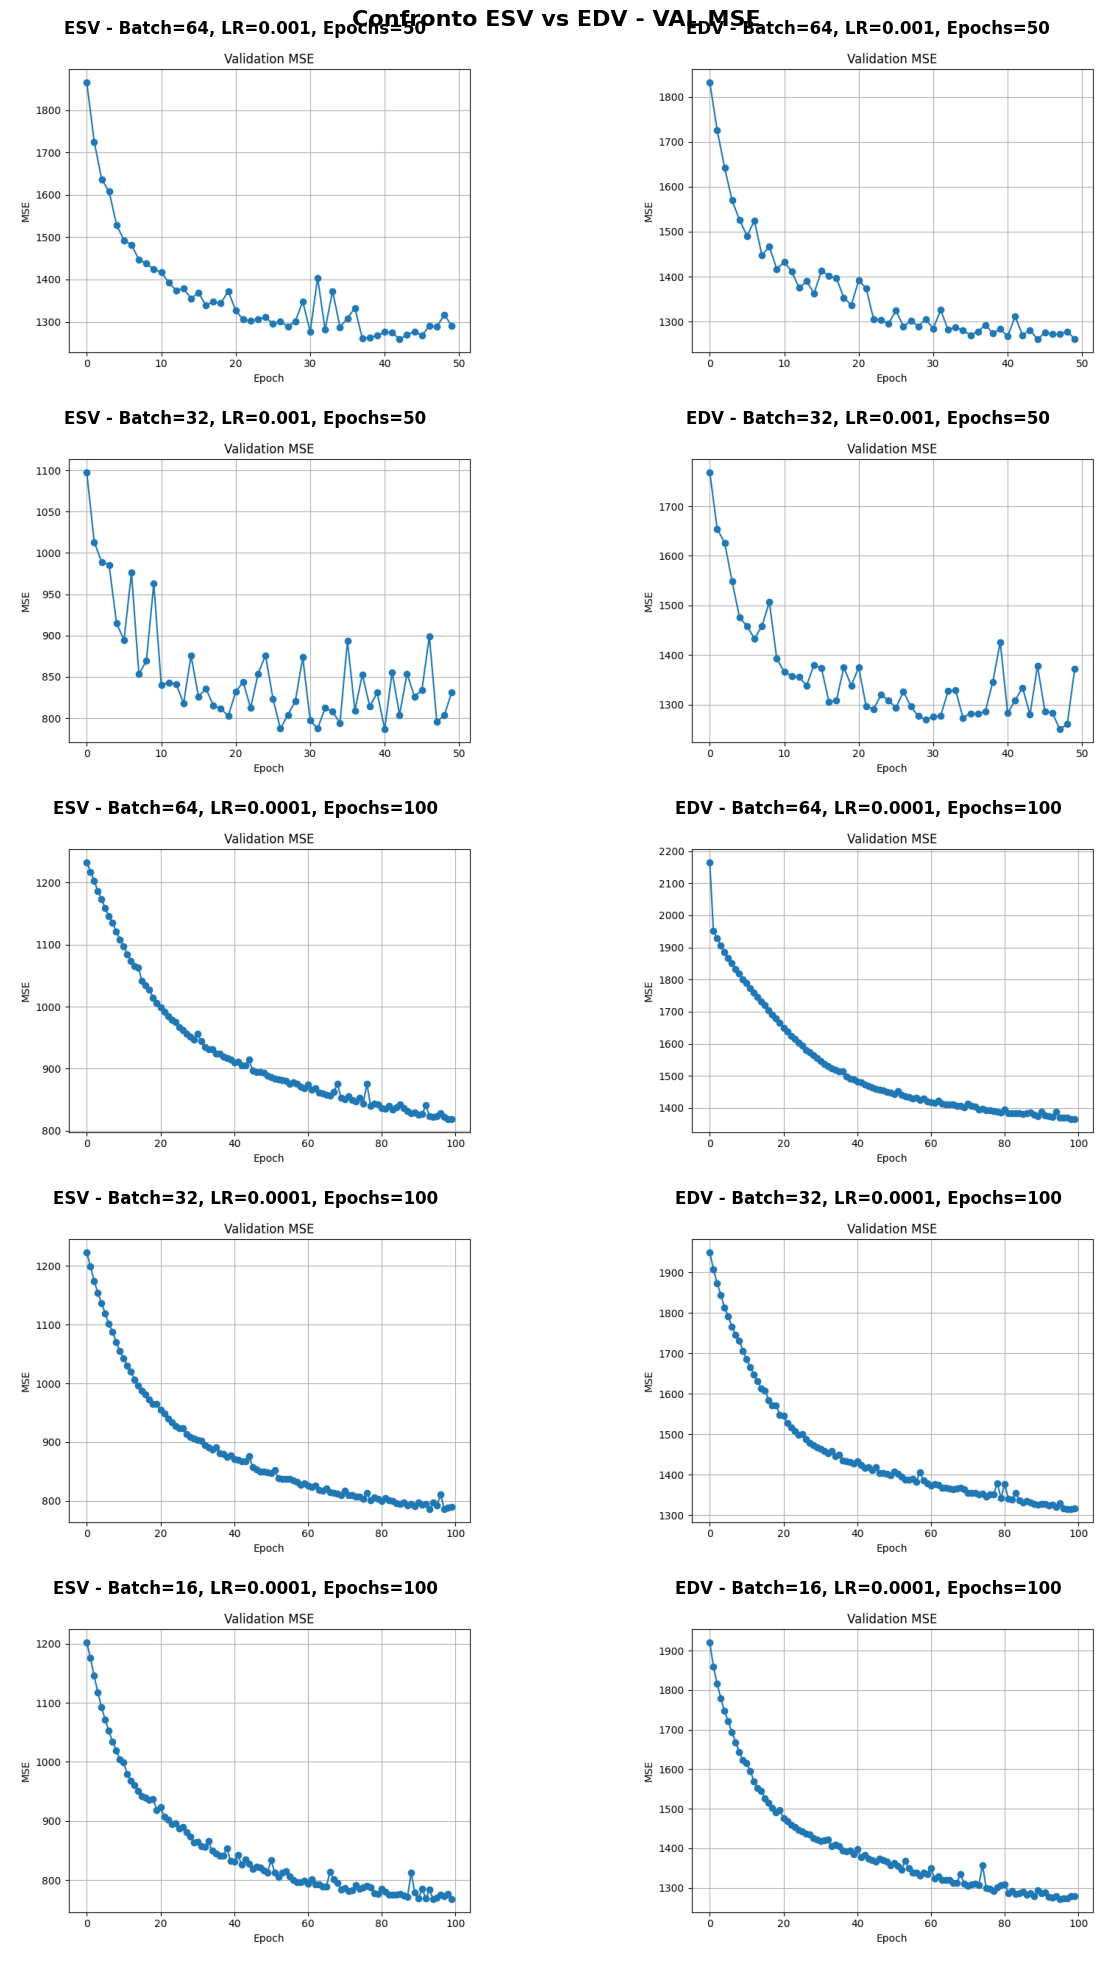


✅ Fatto! Creati 3 file di confronto.


In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# MODIFICA QUESTO PATH
BASE_PATH = '/content/drive/MyDrive/vit_experiments'

# Coppie ESV vs EDV con stessi iperparametri
COMPARISONS = [
    {
        'name': 'Batch=64, LR=0.001, Epochs=50',
        'esv': '2026-01-21_22-50-44',
        'edv': '2026-01-25_15-58-56'
    },
    {
        'name': 'Batch=32, LR=0.001, Epochs=50',
        'esv': '2026-01-26_09-50-29',
        'edv': '2026-01-26_12-48-34'
    },
    {
        'name': 'Batch=64, LR=0.0001, Epochs=100',
        'esv': '2026-01-28_18-03-35',
        'edv': '2026-01-31_09-55-56'
    },
    {
        'name': 'Batch=32, LR=0.0001, Epochs=100',
        'esv': '2026-01-28_11-09-15',
        'edv': '2026-01-31_16-26-28'
    },
    {
        'name': 'Batch=16, LR=0.0001, Epochs=100',
        'esv': '2026-01-27_16-04-55',
        'edv': '2026-02-01_10-48-07'
    }
]

PLOT_TYPES = ['train_loss.png', 'val_r2.png', 'val_mse.png']

# Per ogni tipo di plot
for plot_name in PLOT_TYPES:
    # Crea figura con righe per ogni confronto
    n_comparisons = len(COMPARISONS)
    fig, axes = plt.subplots(n_comparisons, 2, figsize=(14, 4*n_comparisons))

    fig.suptitle(f'Confronto ESV vs EDV - {plot_name.replace(".png", "").replace("_", " ").upper()}',
                 fontsize=16, fontweight='bold')

    for i, comp in enumerate(COMPARISONS):
        # Path alle immagini
        esv_path = os.path.join(BASE_PATH, comp['esv'], 'plots', plot_name)
        edv_path = os.path.join(BASE_PATH, comp['edv'], 'plots', plot_name)

        # Subplot ESV
        ax_esv = axes[i, 0] if n_comparisons > 1 else axes[0]
        if os.path.exists(esv_path):
            img = mpimg.imread(esv_path)
            ax_esv.imshow(img)
            ax_esv.set_title(f'ESV - {comp["name"]}', fontweight='bold')
        else:
            ax_esv.text(0.5, 0.5, 'Immagine non trovata', ha='center', va='center')
        ax_esv.axis('off')

        # Subplot EDV
        ax_edv = axes[i, 1] if n_comparisons > 1 else axes[1]
        if os.path.exists(edv_path):
            img = mpimg.imread(edv_path)
            ax_edv.imshow(img)
            ax_edv.set_title(f'EDV - {comp["name"]}', fontweight='bold')
        else:
            ax_edv.text(0.5, 0.5, 'Immagine non trovata', ha='center', va='center')
        ax_edv.axis('off')

    plt.tight_layout()
    output_name = f'confronto_{plot_name}'
    plt.savefig(output_name, dpi=300, bbox_inches='tight')
    print(f'✓ Salvato: {output_name}')
    plt.show()

print('\n✅ Fatto! Creati 3 file di confronto.')

# Deploy Your Model to the Edge

![Roboflow Inference banner](https://blog.roboflow.com/content/images/2023/08/banner.png)

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.